In [1]:
# Dependencies
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import math


file_1 = "co-est2021-pop-13.csv"
file_2 = "co-est2020-alldata.csv"

file_1_df = pd.read_csv(file_1, delimiter=",", skiprows=3)

file_1_df.tail(10)
recent_census =file_1_df.drop(range(160,165))
recent_census


,Unnamed: 0,Unnamed: 1,2020,2021
0,Georgia,"10,711,908","10,725,800","10,799,566"
1,".Appling County, Georgia","18,444","18,428","18,488"
2,".Atkinson County, Georgia","8,286","8,301","8,391"
3,".Bacon County, Georgia","11,140","11,123","11,079"
4,".Baker County, Georgia","2,876","2,844","2,819"
...,...,...,...,...
155,".Whitfield County, Georgia","102,864","102,727","102,848"
156,".Wilcox County, Georgia","8,766","8,731","8,739"
157,".Wilkes County, Georgia","9,565","9,556","9,513"
158,".Wilkinson County, Georgia","8,877","8,844","8,831"


In [2]:
recent_census21 = recent_census['Unnamed: 0'].str.replace('.','')
recent_census21


C:\Users\yhuan\AppData\Local\Temp/ipykernel_12036/989136.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  recent_census21 = recent_census['Unnamed: 0'].str.replace('.','')


0                        Georgia
1        Appling County, Georgia
2       Atkinson County, Georgia
3          Bacon County, Georgia
4          Baker County, Georgia
                 ...            
155    Whitfield County, Georgia
156       Wilcox County, Georgia
157       Wilkes County, Georgia
158    Wilkinson County, Georgia
159        Worth County, Georgia
Name: Unnamed: 0, Length: 160, dtype: object

In [3]:
# 2021 data
data21 = recent_census[['2020','2021']]

census_20 = pd.to_numeric(data21['2020'].str.replace(',',''), errors = 'coerce')

census_20

0      10725800
1         18428
2          8301
3         11123
4          2844
         ...   
155      102727
156        8731
157        9556
158        8844
159       20719
Name: 2020, Length: 160, dtype: int64

In [4]:
census_21 = pd.to_numeric(recent_census['2021'].str.replace(',',''), errors = 'coerce')

census_21

0      10799566
1         18488
2          8391
3         11079
4          2819
         ...   
155      102848
156        8739
157        9513
158        8831
159       20554
Name: 2021, Length: 160, dtype: int64

In [5]:
organized_21 = pd.DataFrame({"County":recent_census21,"2020":census_20, "2021":census_21 })

census21_df= organized_21.set_index("County")

census21_df

,2020,2021
County,,
Georgia,10725800,10799566
"Appling County, Georgia",18428,18488
"Atkinson County, Georgia",8301,8391
"Bacon County, Georgia",11123,11079
"Baker County, Georgia",2844,2819
...,...,...
"Whitfield County, Georgia",102727,102848
"Wilcox County, Georgia",8731,8739
"Wilkes County, Georgia",9556,9513


In [6]:
file_2_df = pd.read_csv(file_2, delimiter=",", encoding="ISO-8859-1")

# file_2_df
file_2_ga = file_2_df[file_2_df['STNAME'] == 'Georgia']
file_2_ga.to_csv('cleanerCounties.csv')
file_2_ga

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019,RNETMIG2020
398,40,3,5,13,0,Georgia,Georgia,9687653,9688737,9712209,...,3.041427,3.798407,1.747055,4.060100,5.814395,7.200931,5.948622,5.638213,6.502924,4.765012
399,50,3,5,13,1,Georgia,Appling County,18236,18237,18337,...,3.098163,-9.988871,-4.843669,2.931914,-4.662637,-0.813824,-1.626457,4.109774,-8.340780,-2.941657
400,50,3,5,13,3,Georgia,Atkinson County,8375,8380,8363,...,-9.329028,-18.178535,-4.116970,-14.082797,7.737879,-11.188643,-7.009063,6.505632,-16.613495,8.402353
401,50,3,5,13,5,Georgia,Bacon County,11096,11097,11062,...,7.833603,-5.021971,0.089582,0.715820,1.071285,2.400747,-9.077964,-10.313901,-2.342976,-7.590133
402,50,3,5,13,7,Georgia,Baker County,3451,3447,3431,...,-38.267576,11.974255,-8.933889,-18.694407,-27.782065,-1.881763,-3.468390,-25.932448,-16.297262,-24.592888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,50,3,5,13,313,Georgia,Whitfield County,102599,102602,102740,...,-5.533701,-5.965944,-7.713370,-1.963739,-0.193555,1.134970,-7.072937,-4.851221,-1.439719,-7.111897
554,50,3,5,13,315,Georgia,Wilcox County,9255,9251,9313,...,-6.572922,-18.889556,1.324284,-14.569315,12.371823,-17.704073,-7.380493,4.213163,-21.390374,-8.299725
555,50,3,5,13,317,Georgia,Wilkes County,10593,10593,10389,...,-13.676706,-12.202923,-10.187775,4.424111,0.301705,-7.600709,9.859728,3.449500,-4.588559,-0.822073
556,50,3,5,13,319,Georgia,Wilkinson County,9563,9569,9528,...,-14.360382,7.303906,-11.569897,-8.581849,-19.495725,-3.425225,-5.674864,10.246130,-7.914832,-9.240478


In [7]:
# # trimming df to just populations and name
# ga_census_estimate_population = file_2_ga[["CTYNAME", "POPESTIMATE2010","POPESTIMATE2011","POPESTIMATE2012","POPESTIMATE2013", "POPESTIMATE2014", "POPESTIMATE2015", "POPESTIMATE2016", "POPESTIMATE2017","POPESTIMATE2018","POPESTIMATE2019","POPESTIMATE2020"]]
# ga_census_estimate_population.reset_index()
# ga_census_estimate_population = ga_census_estimate_population.rename(columns={"POPESTIMATE2010": "2010", "POPESTIMATE2011": "2011", "POPESTIMATE2012": "2012", "POPESTIMATE2013": "2013", "POPESTIMATE2014": "2014", 
#                                              "POPESTIMATE2015": "2015", "POPESTIMATE2016": "2016", "POPESTIMATE2017": "2017", "POPESTIMATE2018": "2018", "POPESTIMATE2019": "2019", "POPESTIMATE2020": "2020"})
# ga_census_estimate_population

In [8]:
# this is Yi's 
# ga_census_estimate = file_2_ga[["CTYNAME", "POPESTIMATE2010","POPESTIMATE2011","POPESTIMATE2012","POPESTIMATE2013", "POPESTIMATE2014", "POPESTIMATE2015", "POPESTIMATE2016", "POPESTIMATE2017","POPESTIMATE2018","POPESTIMATE2019","POPESTIMATE2020","NPOPCHG_2017","NPOPCHG_2018","NPOPCHG_2019","NPOPCHG_2020","NETMIG2017","NETMIG2018","NETMIG2019","NETMIG2020"]]
# ga_census_estimate.reset_index()


In [9]:
ga_census_estimate_population = file_2_ga[["CTYNAME","POPESTIMATE2010","POPESTIMATE2011","POPESTIMATE2012","POPESTIMATE2013", "POPESTIMATE2014", "POPESTIMATE2015", "POPESTIMATE2016", "POPESTIMATE2017", "POPESTIMATE2018","POPESTIMATE2019","POPESTIMATE2020"]]
ga_census_estimate_population = ga_census_estimate_population.rename(columns={"POPESTIMATE2010": "2010", "POPESTIMATE2011": "2011", "POPESTIMATE2012": "2012", "POPESTIMATE2013": "2013", "POPESTIMATE2014": "2014", "POPESTIMATE2015": "2015", "POPESTIMATE2016": "2016", "POPESTIMATE2017": "2017", "POPESTIMATE2018": "2018", "POPESTIMATE2019": "2019", "POPESTIMATE2020": "2020"})
ga_census_20 = ga_census_estimate_population.set_index("CTYNAME")
ga_census_20

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
CTYNAME,,,,,,,,,,,
Georgia,9712209,9803630,9903580,9975592,10071204,10183353,10308442,10417031,10519389,10628020,10710017
Appling County,18337,18459,18382,18367,18469,18420,18443,18447,18538,18389,18325
Atkinson County,8363,8359,8254,8263,8211,8331,8293,8257,8344,8269,8393
Bacon County,11062,11150,11152,11174,11178,11225,11268,11204,11096,11098,11036
Baker County,3431,3311,3370,3346,3287,3192,3185,3158,3089,3047,2971
...,...,...,...,...,...,...,...,...,...,...,...
Whitfield County,102740,102909,102926,102691,103039,103621,104314,104086,104109,104265,103837
Wilcox County,9313,9248,9069,9054,8929,9015,8834,8780,8784,8607,8502
Wilkes County,10389,10230,10093,9931,9960,9927,9808,9868,9845,9769,9694


In [10]:
# merge_census = ga_census_20.merge(census21_df,how ='left', on ='CTYNAME')

# merge_census = census21_df.merge(ga_census_20,how ='left', on ='County')

# merge_census

In [11]:
years = ga_census_20.keys()

years


Index(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020'],
      dtype='object')

In [12]:
# pick x numbers randomly
randomNumbers = []
i = 0
while i < 10:
    
    num = random.randint(1, 159)
    if num not in randomNumbers:
        randomNumbers.append(num)
        print(randomNumbers)
        i = i + 1

[41]
[41, 50]
[41, 50, 151]
[41, 50, 151, 66]
[41, 50, 151, 66, 122]
[41, 50, 151, 66, 122, 14]
[41, 50, 151, 66, 122, 14, 58]
[41, 50, 151, 66, 122, 14, 58, 158]
[41, 50, 151, 66, 122, 14, 58, 158, 135]
[41, 50, 151, 66, 122, 14, 58, 158, 135, 45]


In [13]:
# ga_census_estimate_population.iloc[86]

countyDataDictionary = {}

for x in randomNumbers:

    countyDataDictionary[x] = ga_census_20.iloc[x]
countyDataDictionary


{41: 2010    16632
 2011    16605
 2012    16528
 2013    16466
 2014    16299
 2015    16176
 2016    16249
 2017    16270
 2018    16238
 2019    16103
 2020    16057
 Name: Dade County, dtype: int64,
 50: 2010    4014
 2011    4063
 2012    3965
 2013    3992
 2014    4027
 2015    4024
 2016    3934
 2017    3888
 2018    3933
 2019    3963
 2020    4002
 Name: Echols County, dtype: int64,
 151: 2010    30080
 2011    30301
 2012    30331
 2013    30009
 2014    29916
 2015    29460
 2016    30038
 2017    29843
 2018    29874
 2019    30017
 2020    30023
 Name: Wayne County, dtype: int64,
 66: 2010    15977
 2011    16049
 2012    16116
 2013    16241
 2014    16418
 2015    16620
 2016    16892
 2017    17225
 2018    17730
 2019    18356
 2020    18837
 Name: Greene County, dtype: int64,
 122: 2010    85359
 2011    85423
 2012    85453
 2013    86522
 2014    87222
 2015    88424
 2016    88995
 2017    89800
 2018    90402
 2019    90639
 2020    90939
 Name: Rockdale County,

2010    16632
2011    16605
2012    16528
2013    16466
2014    16299
2015    16176
2016    16249
2017    16270
2018    16238
2019    16103
2020    16057
Name: Dade County, dtype: int64
2010    4014
2011    4063
2012    3965
2013    3992
2014    4027
2015    4024
2016    3934
2017    3888
2018    3933
2019    3963
2020    4002
Name: Echols County, dtype: int64
2010    30080
2011    30301
2012    30331
2013    30009
2014    29916
2015    29460
2016    30038
2017    29843
2018    29874
2019    30017
2020    30023
Name: Wayne County, dtype: int64
2010    15977
2011    16049
2012    16116
2013    16241
2014    16418
2015    16620
2016    16892
2017    17225
2018    17730
2019    18356
2020    18837
Name: Greene County, dtype: int64
2010    85359
2011    85423
2012    85453
2013    86522
2014    87222
2015    88424
2016    88995
2017    89800
2018    90402
2019    90639
2020    90939
Name: Rockdale County, dtype: int64
2010    16246
2011    15982
2012    15616
2013    15648
2014    15524
20

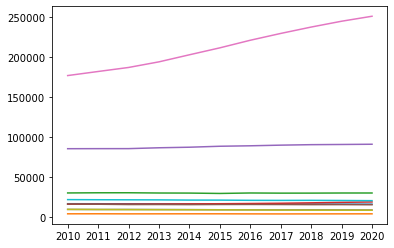

In [14]:
label=[]

for x in countyDataDictionary:
    print(countyDataDictionary[x])
    label.append(x)
    plt.plot(years, countyDataDictionary[x], label = label)
# plt.legend(handles=[x], loc="best")
# plt.yscale('log')
plt.show()

In [15]:
# # 2021 data
recent_census = data21[['2020','2021']]

census_21 = pd.to_numeric(recent_census['2021'].str.replace(',',''), errors = 'coerce')

census_21

0      10799566
1         18488
2          8391
3         11079
4          2819
         ...   
155      102848
156        8739
157        9513
158        8831
159       20554
Name: 2021, Length: 160, dtype: int64

In [16]:
years2 = census21_df.keys()

years2

Index(['2020', '2021'], dtype='object')

In [17]:
# pick x numbers randomly
randomNumbers2 = []
i = 0
while i < 10:
    
    num2 = random.randint(1, 159)
    if num2 not in randomNumbers2:
        randomNumbers2.append(num2)
        print(randomNumbers2)
        i = i + 1

[46]
[46, 7]
[46, 7, 57]
[46, 7, 57, 124]
[46, 7, 57, 124, 1]
[46, 7, 57, 124, 1, 22]
[46, 7, 57, 124, 1, 22, 21]
[46, 7, 57, 124, 1, 22, 21, 94]
[46, 7, 57, 124, 1, 22, 21, 94, 151]
[46, 7, 57, 124, 1, 22, 21, 94, 151, 153]


2020    11142
2021    10885
Name: Dooly County, Georgia, dtype: int64
2020    83963
2021    86658
Name: Barrow County, Georgia, dtype: int64
2020    98593
2021    98771
Name: Floyd County, Georgia, dtype: int64
2020    14060
2021    14105
Name: Screven County, Georgia, dtype: int64
2020    18428
2021    18488
Name: Appling County, Georgia, dtype: int64
2020    119463
2021    121968
Name: Carroll County, Georgia, dtype: int64
2020    11001
2021    11037
Name: Candler County, Georgia, dtype: int64
2020    21587
2021    21633
Name: McDuffie County, Georgia, dtype: int64
2020    30155
2021    30380
Name: Wayne County, Georgia, dtype: int64
2020    7430
2021    7471
Name: Wheeler County, Georgia, dtype: int64


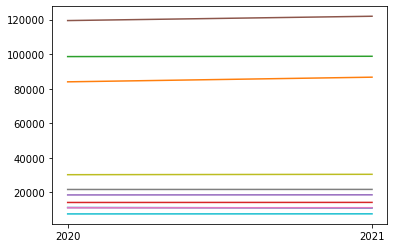

In [18]:
countyDataDictionary2 = {}

for x in randomNumbers2:

    countyDataDictionary2[x] = census21_df.iloc[x]        

for x in countyDataDictionary2:
    print(countyDataDictionary2[x])
    label.append(x)
    plt.plot(years2, countyDataDictionary2[x])
# plt.legend(handles=[x], loc="best")
# plt.yscale('log')
plt.show()

In [19]:
ga_census_estimate_population

,CTYNAME,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
398,Georgia,9712209,9803630,9903580,9975592,10071204,10183353,10308442,10417031,10519389,10628020,10710017
399,Appling County,18337,18459,18382,18367,18469,18420,18443,18447,18538,18389,18325
400,Atkinson County,8363,8359,8254,8263,8211,8331,8293,8257,8344,8269,8393
401,Bacon County,11062,11150,11152,11174,11178,11225,11268,11204,11096,11098,11036
402,Baker County,3431,3311,3370,3346,3287,3192,3185,3158,3089,3047,2971
...,...,...,...,...,...,...,...,...,...,...,...,...
553,Whitfield County,102740,102909,102926,102691,103039,103621,104314,104086,104109,104265,103837
554,Wilcox County,9313,9248,9069,9054,8929,9015,8834,8780,8784,8607,8502
555,Wilkes County,10389,10230,10093,9931,9960,9927,9808,9868,9845,9769,9694
556,Wilkinson County,9528,9413,9481,9361,9283,9080,9021,8953,9005,8936,8812


In [20]:
# ga_census_estimate_population = ga_census_estimate_population.set_index('CTYNAME')
ga_census_estimate_population


,CTYNAME,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
398,Georgia,9712209,9803630,9903580,9975592,10071204,10183353,10308442,10417031,10519389,10628020,10710017
399,Appling County,18337,18459,18382,18367,18469,18420,18443,18447,18538,18389,18325
400,Atkinson County,8363,8359,8254,8263,8211,8331,8293,8257,8344,8269,8393
401,Bacon County,11062,11150,11152,11174,11178,11225,11268,11204,11096,11098,11036
402,Baker County,3431,3311,3370,3346,3287,3192,3185,3158,3089,3047,2971
...,...,...,...,...,...,...,...,...,...,...,...,...
553,Whitfield County,102740,102909,102926,102691,103039,103621,104314,104086,104109,104265,103837
554,Wilcox County,9313,9248,9069,9054,8929,9015,8834,8780,8784,8607,8502
555,Wilkes County,10389,10230,10093,9931,9960,9927,9808,9868,9845,9769,9694
556,Wilkinson County,9528,9413,9481,9361,9283,9080,9021,8953,9005,8936,8812


In [21]:

years = ga_census_estimate_population.keys()
# Plot the unemployment values for a single country
# country_one, = plt.plot(years, combined_unemployed_data.loc['USA',["2010","2011","2012","2013","2014","2015",
#                                                                   "2016","2017","2018","2019","2020"]], 
#                         color="green",label=combined_unemployed_data.loc['USA',"Country Name"])


In [22]:
# country_one, = plt.plot(years, ga_census_estimate_population.loc['Liberty County',["2010","2011","2012","2013","2014","2015",
#                                                                   "2016","2017","2018","2019","2020"]], 
#                         color="green")

# plt.show()

In [23]:
# ga_census_estimate_population.loc[:,["2010","2011","2012","2013","2014","2015",
#                                                                   "2016","2017","2018","2019","2020"]]
# ga_census_estimate_population.loc["Georgia"]


# # transposed = ga_census_estimate_population.T
# # ax.plot(df_pop_density['Country'],
# #          df_pop_density['Area(100kmsq)'],
# #          marker='o', linewidth=2, label='Area')


# country_one, = plt.plot(years, ga_census_estimate_population.loc["Chatham County"], label="Chatham County")
# country_one, = plt.plot(years, ga_census_estimate_population.loc["Liberty County"], label="Liberty County")


# plt.xticks(rotation=90)
# plt.show()

ValueError: x and y must have same first dimension, but have shapes (12,) and (11,)

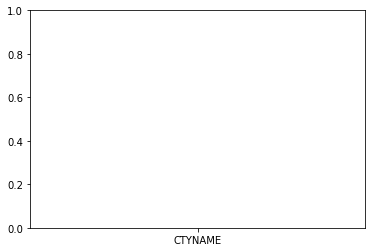

In [24]:

for x in countyDataDictionary.keys():
#     print(countyDataDictionary[x])
    plt.plot(years, countyDataDictionary[x])
    
plt.xticks(rotation=90)    
plt.show()
